<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_10/Geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install cartopy


In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
from cartopy import crs


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
type(world)

In [34]:
type(world.geometry)

geopandas.geoseries.GeoSeries

In [35]:
world.geometry.name

'geometry'

In [37]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroids
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((14225119.286 15368214.673, 142...",POINT (163.85316 -17.31631)
1,58005463.0,Africa,Tanzania,TZA,63177,"MULTIPOLYGON (((4191788.690 600396.593, 421538...",POINT (34.75299 -6.25773)
2,603253.0,Africa,W. Sahara,ESH,907,"MULTIPOLYGON (((-833832.927 2996093.252, -8344...",POINT (-12.13783 24.29117)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-6979392.367 10111959.518, -69...",POINT (-98.14238 61.46908)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-6979392.367 10111959.518, -68...",POINT (-112.59944 45.70563)


*for plotting the map*

<Axes: >

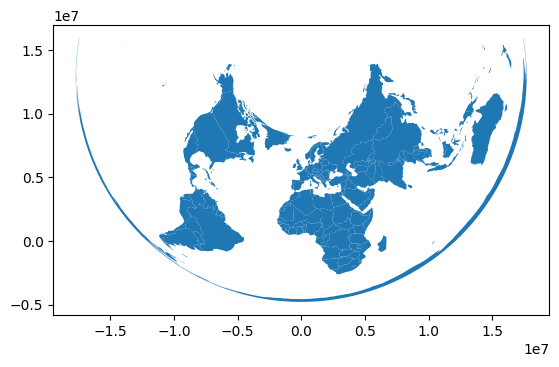

In [38]:
world.plot()

In [39]:
type(world.centroid) #store the centroids of the shapes in the active geometry column.

geopandas.geoseries.GeoSeries

In [42]:
world['centroids'] = world.centroid
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroids
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((14225119.286 15368214.673, 142...",POINT (13158007.850 15179975.291)
1,58005463.0,Africa,Tanzania,TZA,63177,"MULTIPOLYGON (((4191788.690 600396.593, 421538...",POINT (4459293.794 164729.989)
2,603253.0,Africa,W. Sahara,ESH,907,"MULTIPOLYGON (((-833832.927 2996093.252, -8344...",POINT (-1216557.844 2652769.012)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-6979392.367 10111959.518, -69...",POINT (-5148710.796 9138390.405)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-6979392.367 10111959.518, -68...",POINT (-6839091.811 8672442.946)


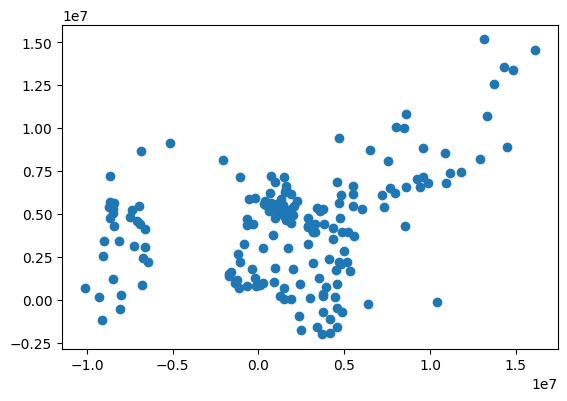

In [43]:
world = world.set_geometry('centroids') # change the active geometrycolumn
world.plot();

In [44]:
crs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
world.crs

<Projected CRS: +proj=aea +ellps=WGS84 +lon_0=0.0 +lat_0=0.0 +x_0= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

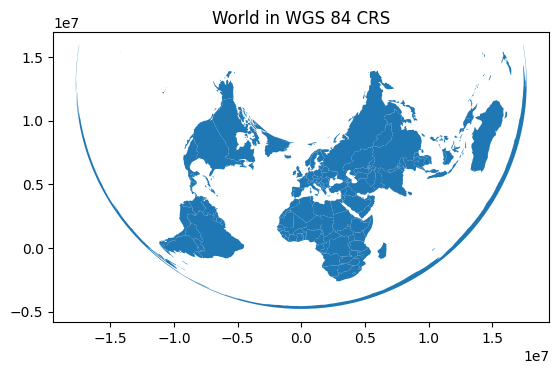

In [46]:
world = world.set_geometry('geometry') # set the active geometry
world.plot(); plt.title('World in WGS 84 CRS');

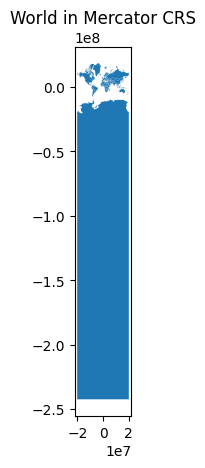

In [47]:
world_Mercator = world.to_crs("EPSG:3395") #convert world from the WGS 84 to the Mercator CRS:
world_Mercator.plot();
plt.title('World in Mercator CRS');

In [48]:
ae = crs.AzimuthalEquidistant() # convert default WGS 84 to azimuthal equidistant CRS
type(ae)

cartopy.crs.AzimuthalEquidistant

<Axes: >

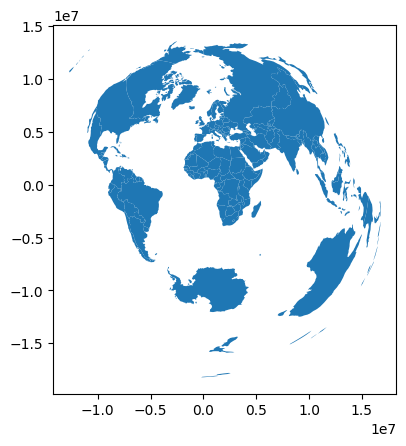

In [49]:
aeproj4 = ae.proj4_init # Convert to`proj4` string/dict usable in gpd
world_ae = world.to_crs(aeproj4) # Then call to_crs method
world_ae.plot()

In [50]:
crs.AzimuthalEquidistant(central_longitude=200, central_latitude=10)

<Projected CRS: +proj=aeqd +ellps=WGS84 +lon_0=200 +lat_0=10 +x_0= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Modified Azimuthal Equidistant
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
aea = crs.AlbersEqualArea()
aea

<Projected CRS: +proj=aea +ellps=WGS84 +lon_0=0.0 +lat_0=0.0 +x_0= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
aea_geo = [aea.project_geometry(ii, src_crs=ae) #converting geometry objects in world_ae to AlbersEqualArea CRS
for ii in world_ae['geometry'].values]

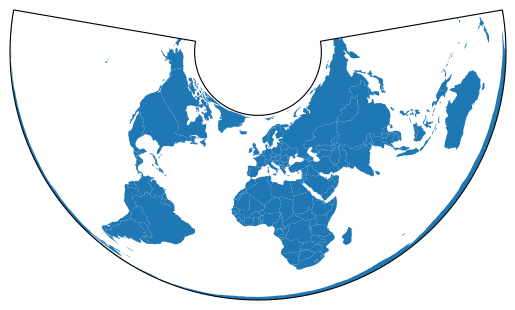

In [53]:
fig, ax = plt.subplots(subplot_kw={'projection': aea}) #implicating resulting geometries in matplotlib’s axis
ax.add_geometries(aea_geo, crs=aea);

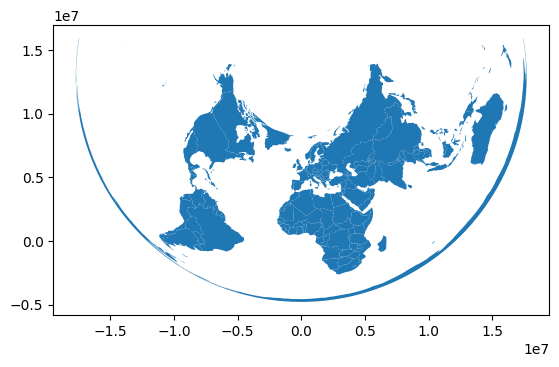

In [54]:
gpd.GeoDataFrame(world, geometry=aea_geo, crs=aea.proj4_init).plot(); #plotting the same plot using geopandas

In [55]:
!pip install GitPython


In [ ]:
import os
from git import Repo

*importing datas from Github*

In [57]:
covidfolder = '../../data_external/covid19'
if os.path.isdir(covidfolder): # if repo exists, pull newest data
  repo = Repo(covidfolder)
  repo.remotes.origin.pull()
else: # otherwise, clone from remote
   repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git',covidfolder)
datadir = repo.working_dir + '/csse_covid_19_data/csse_covid_19_time_series'
f = datadir + '/time_series_covid19_confirmed_global.csv'

In [58]:
c = pd.read_csv(os.path.abspath(f))
c = c.rename(columns={'Country/Region': 'country'}).iloc[:, 1:]
c.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [59]:
len(c['country']) - len(set(c['country']))

88

In [60]:
cg = c.groupby('country')[c.columns[3:]].sum()#using pandas groupby operation
cg['Lat'] = c.groupby('country')['Lat'].mean()
cg['Long'] = c.groupby('country')['Long'].mean()

In [61]:
geo = gpd.points_from_xy(cg['Long'], cg['Lat'])
c_aea_geo = [aea.project_geometry(ii) for ii in geo]
cg = gpd.GeoDataFrame(cg, geometry=c_aea_geo, crs=aea.proj4_init)

In [62]:
def covidworldmap(date):
  fig, ax = plt.subplots(figsize=(12, 10))
  # put the world map on an axis
  w = gpd.GeoDataFrame(world, geometry=aea_geo, crs=aea.proj4_init)
  w.plot(ax=ax, color='midnightblue', edgecolor='darkslategray')
  ax.set_facecolor('dimgray')
  mx = cg.iloc[:, :-3].max().max() # get max across data
  # set marker sizes, with a min marker size for cases > 1000
  msz = 500 * np.where(cg[date]-1000, np.maximum(cg[date]/mx, 0.001), 0)
  cg.plot(ax=ax, cmap='Wistia', markersize=msz, alpha=0.5)
  ax.set_xticks([]) # remove axis marks
  ax.set_yticks([]);

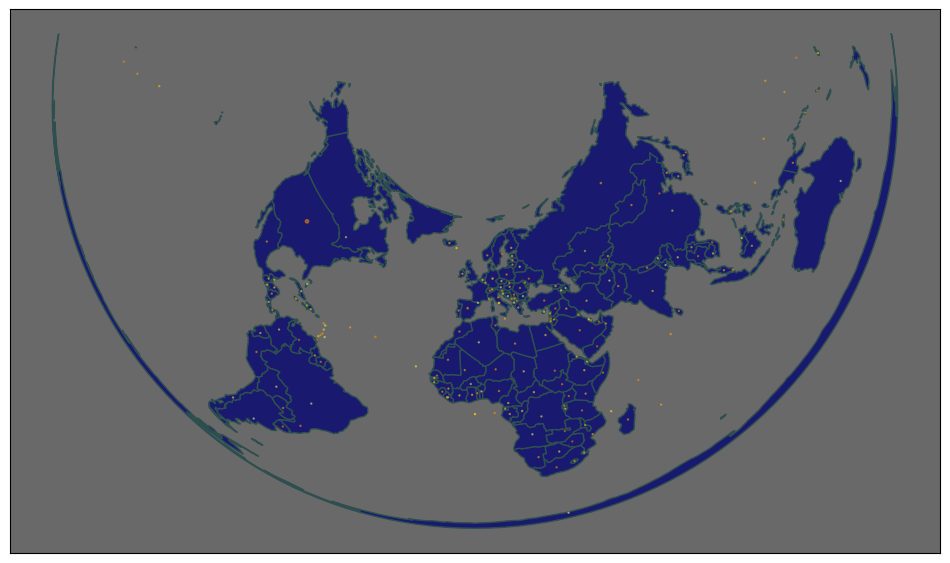

In [63]:
covidworldmap('5/5/20')